In [128]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [129]:
df_= sns.load_dataset("penguins")
df = df_.copy()

In [130]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [131]:
# General Exploration for Dataset
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# Categorical & Numerical Variables:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


# Categorical Variables:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

#  Numerical Variables:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

In [132]:
check_df(df)

##################### Shape #####################
(344, 7)
##################### Types #####################
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
##################### Head #####################
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
##################### Tail ###

<ipython-input-131-cac03ddef676>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [133]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(cat_cols)
print(num_cols)

Observations: 344
Variables: 7
cat_cols: 3
num_cols: 4
cat_but_car: 0
num_but_cat: 0
['species', 'island', 'sex']
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


           species      Ratio
Adelie         152  44.186047
Gentoo         124  36.046512
Chinstrap       68  19.767442
##########################################


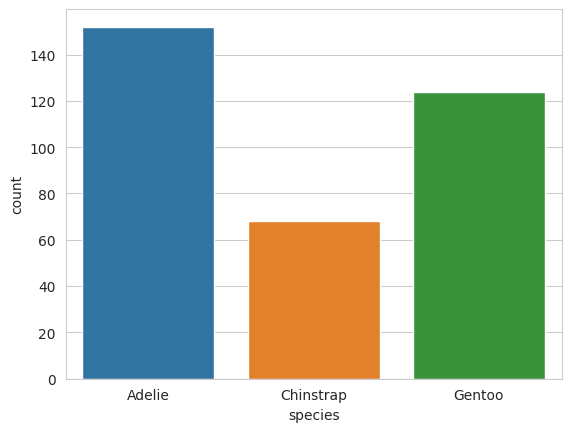

           island      Ratio
Biscoe        168  48.837209
Dream         124  36.046512
Torgersen      52  15.116279
##########################################


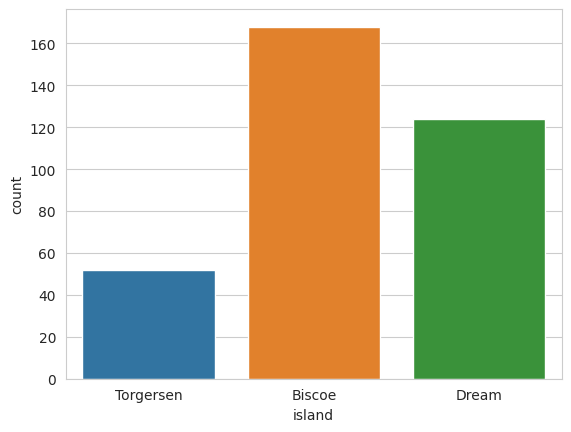

        sex      Ratio
Male    168  48.837209
Female  165  47.965116
##########################################


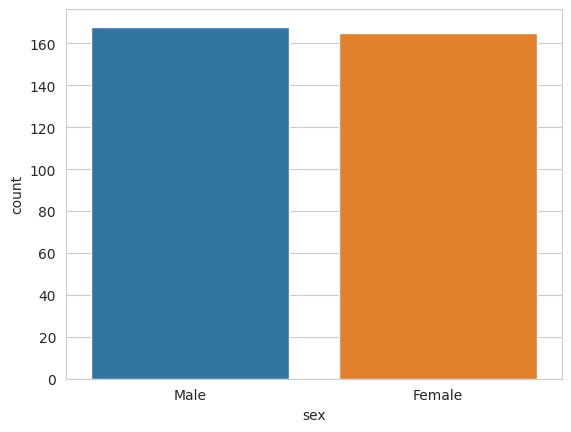

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
5%        35.700000
10%       36.600000
20%       38.340000
30%       40.200000
40%       42.000000
50%       44.450000
60%       46.000000
70%       47.370000
80%       49.380000
90%       50.800000
95%       51.995000
99%       55.513000
max       59.600000
Name: bill_length_mm, dtype: float64


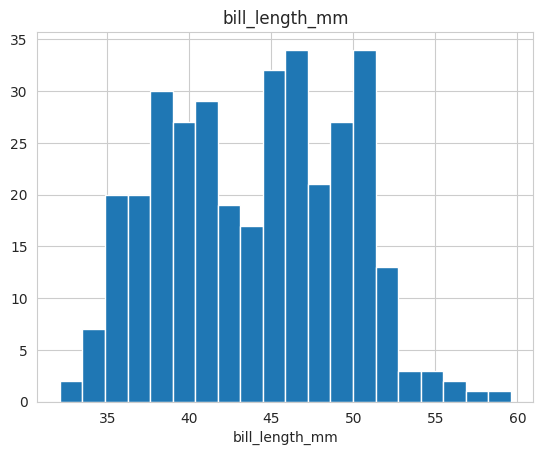

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
5%        13.900000
10%       14.300000
20%       15.000000
30%       15.930000
40%       16.800000
50%       17.300000
60%       17.900000
70%       18.500000
80%       18.900000
90%       19.500000
95%       20.000000
99%       21.100000
max       21.500000
Name: bill_depth_mm, dtype: float64


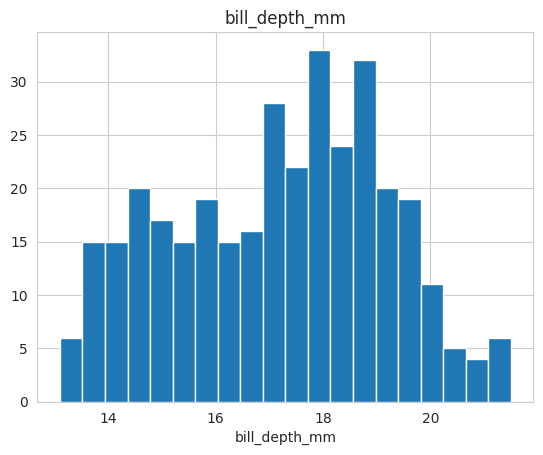

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
5%       181.000000
10%      185.000000
20%      188.000000
30%      191.000000
40%      194.000000
50%      197.000000
60%      203.000000
70%      210.000000
80%      215.000000
90%      220.900000
95%      225.000000
99%      230.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


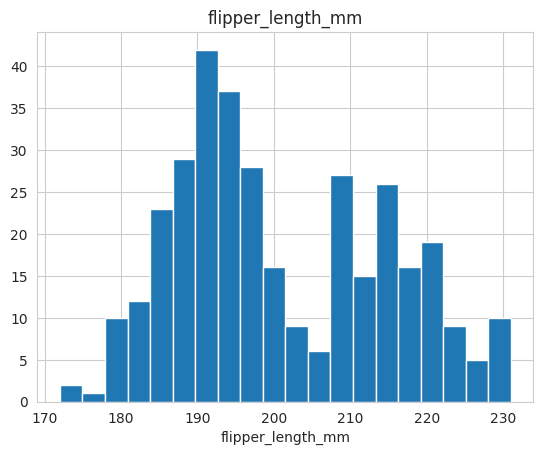

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
5%       3150.000000
10%      3300.000000
20%      3475.000000
30%      3650.000000
40%      3800.000000
50%      4050.000000
60%      4300.000000
70%      4650.000000
80%      4950.000000
90%      5400.000000
95%      5650.000000
99%      5979.500000
max      6300.000000
Name: body_mass_g, dtype: float64


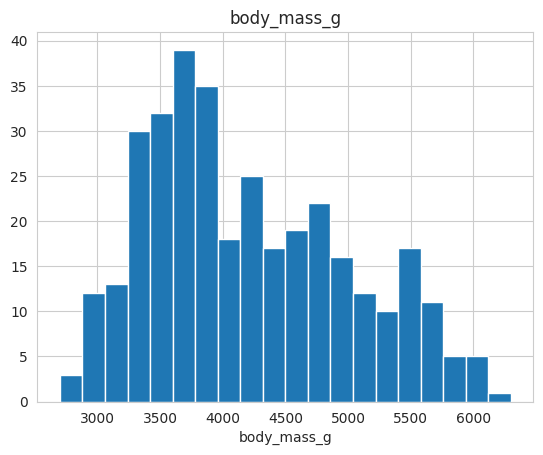

In [134]:
for col in cat_cols:
    cat_summary(df, col, plot=True)
for col in num_cols:
    num_summary(df, col, plot=True)

# **COUNTPLOT**

In [135]:
sns.set_style("dark")

<Axes: xlabel='island', ylabel='count'>

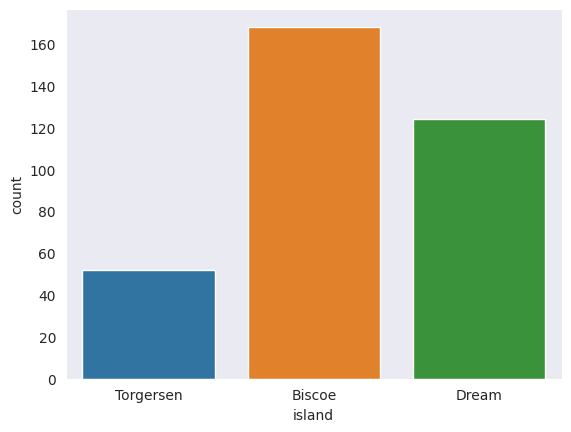

In [136]:
sns.countplot(x=df["island"],data=df)

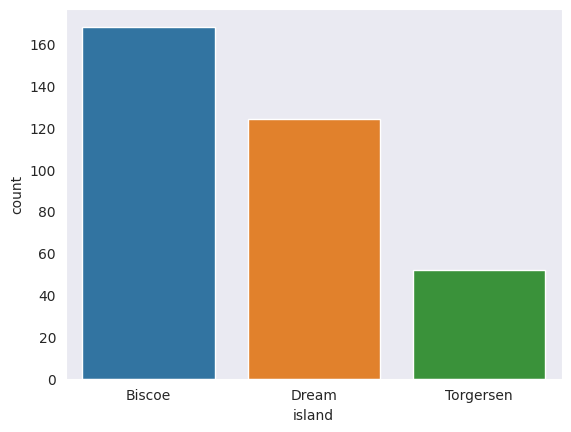

In [137]:
sns.countplot(x=df["island"],data=df, order = df["island"].value_counts().index );  #ordered value

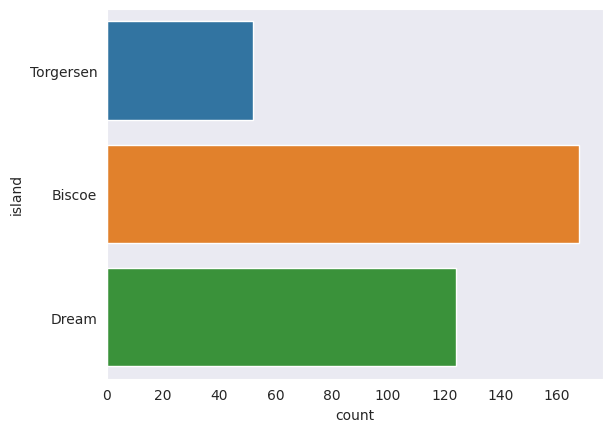

In [138]:
sns.countplot(y=df["island"],data=df);

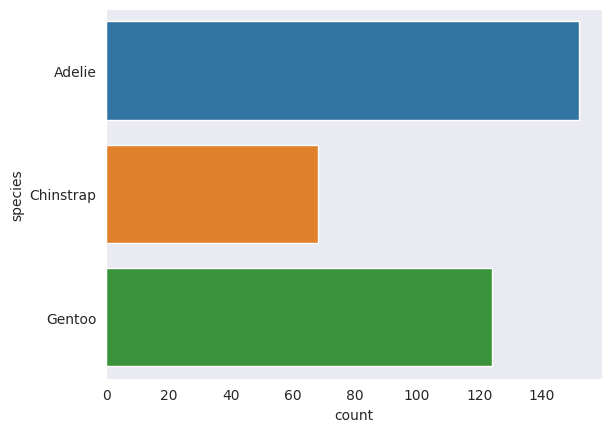

In [139]:
sns.countplot(y=df["species"],data=df);

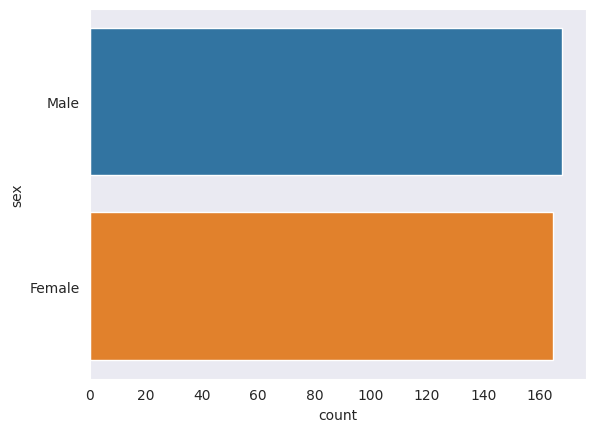

In [140]:
sns.countplot(y=df["sex"],data=df);

<Axes: xlabel='species', ylabel='count'>

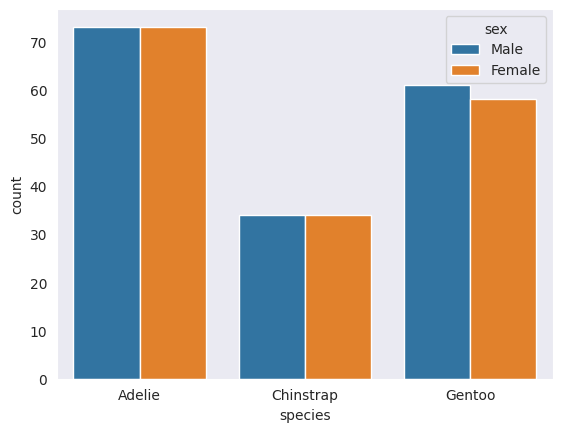

In [141]:
sns.countplot(x=df["species"],data=df, hue = "sex")

<Axes: xlabel='island', ylabel='count'>

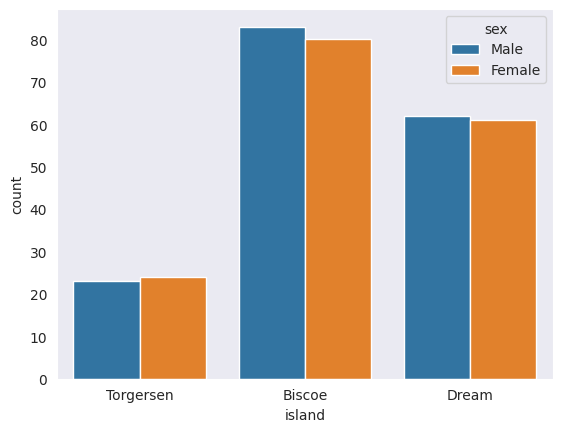

In [142]:
sns.countplot(x=df["island"],data=df, hue = "sex")

<Axes: xlabel='island', ylabel='count'>

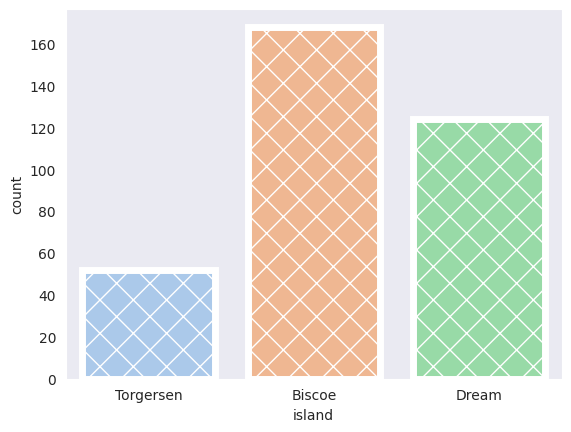

In [143]:
sns.countplot(x=df["island"],data=df, lw =5, ec="white", hatch="X", palette="pastel")

In [144]:
sns.light_palette("pink")

[(0.9522355156546861, 0.9409598749393964, 0.9425268311839579),
 (0.9617884125237489, 0.9033561352456347, 0.913237151221676),
 (0.9713413093928117, 0.8657523955518731, 0.8839474712593943),
 (0.9808942062618744, 0.8281486558581115, 0.8546577912971125),
 (0.9904471031309372, 0.7905449161643499, 0.8253681113348308),
 (1.0, 0.7529411764705882, 0.796078431372549)]

In [145]:
sns.dark_palette("pink")

[(0.186610774992563, 0.13438850336194982, 0.14336936083706975),
 (0.3492886199940504, 0.2580990379836775, 0.2739111749441656),
 (0.5119664649955378, 0.38180957260540516, 0.4044529890512614),
 (0.6746443099970252, 0.5055201072271328, 0.5349948031583573),
 (0.8373221549985126, 0.6292306418488606, 0.6655366172654531),
 (1.0, 0.7529411764705882, 0.796078431372549)]

In [146]:
sns.blend_palette(["pink","blue"])

[(1.0, 0.7529411764705882, 0.796078431372549),
 (0.8, 0.6023529411764705, 0.8368627450980392),
 (0.6, 0.4517647058823529, 0.8776470588235294),
 (0.4, 0.3011764705882353, 0.9184313725490196),
 (0.19999999999999996, 0.15058823529411758, 0.9592156862745098),
 (0.0, 0.0, 1.0)]

In [147]:
palette_dic = {x: 'gray' for x in df.species.unique()}

In [148]:
palette_dic

{'Adelie': 'gray', 'Chinstrap': 'gray', 'Gentoo': 'gray'}

In [149]:
palette_dic ['Gentoo'] = "crimson"

In [150]:
palette_dic

{'Adelie': 'gray', 'Chinstrap': 'gray', 'Gentoo': 'crimson'}

# **SCATTER PLOT**

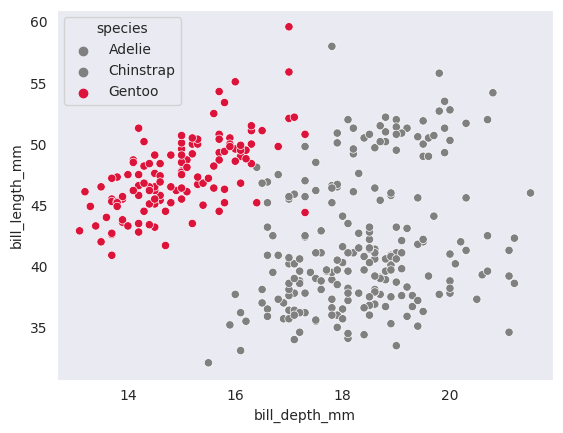

In [151]:
sns.scatterplot (x= "bill_depth_mm", y= "bill_length_mm",data= df , hue="species", palette = palette_dic );

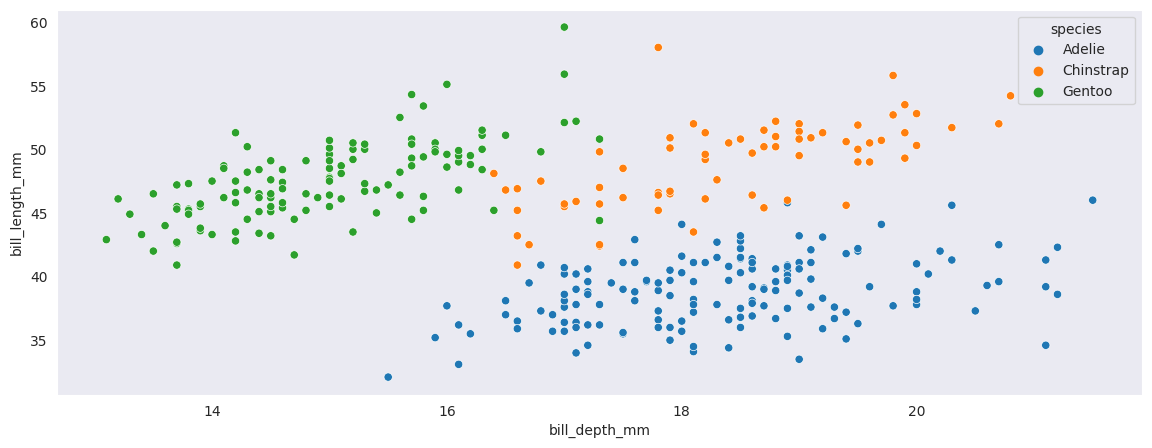

In [152]:
plt.figure(figsize=(14,5))
sns.scatterplot (x= "bill_depth_mm", y= "bill_length_mm",data= df , hue="species");


# **BARPLOT**

In [153]:
# A bar plot is a graphical representation used to display categorical data with rectangular bars.
# Each bar represents a category, and the height or length of the bar corresponds to the value or frequency of that category.

In [154]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

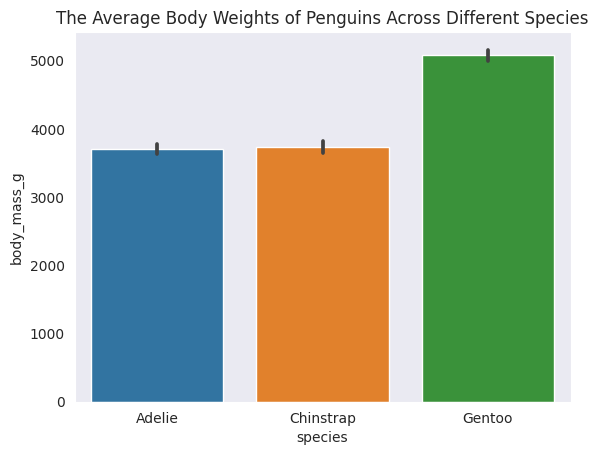

In [155]:
sns.barplot(x = df["species"],y = df ["body_mass_g"] )
plt.title("The Average Body Weights of Penguins Across Different Species")
plt.show()

In [156]:
df.groupby("species").agg({"body_mass_g":"mean"})  #pivot table and barplot work like siblings :)
# or
# df.groupby("species").body_mass_g.mean()

body_mass_g
species               
Adelie     3700.662252
Chinstrap  3733.088235
Gentoo     5076.016260

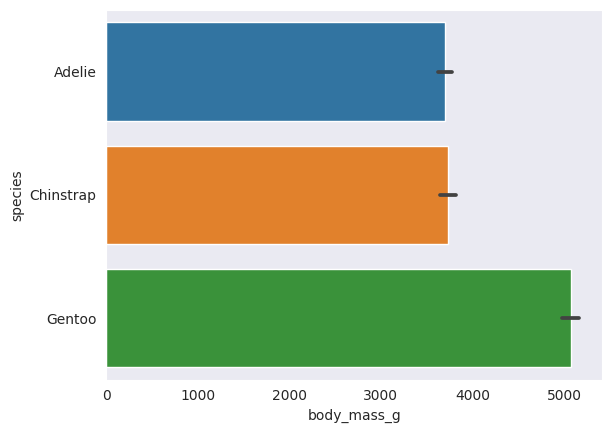

In [157]:
sns.barplot(x = df["body_mass_g"],y = df ["species"] );

<ipython-input-158-89bf11261557>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df["species"],y = df ["body_mass_g"],ci=None );  #confidence interval bar disappeared ..! Default value ci=95


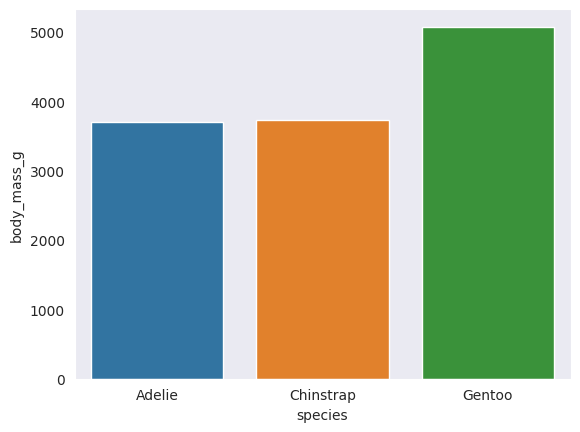

In [158]:
sns.barplot(x = df["species"],y = df ["body_mass_g"],ci=None );  #confidence interval bar disappeared ..! Default value ci=95

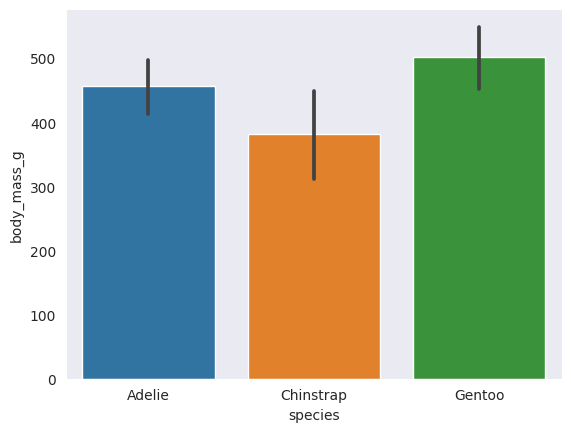

In [159]:
sns.barplot(x = df["species"],y = df ["body_mass_g"], estimator = np.std );

In [160]:
df.groupby("species").body_mass_g.describe()

count         mean         std     min     25%     50%     75%  \
species                                                                     
Adelie     151.0  3700.662252  458.566126  2850.0  3350.0  3700.0  4000.0   
Chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
Gentoo     123.0  5076.016260  504.116237  3950.0  4700.0  5000.0  5500.0   

              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0

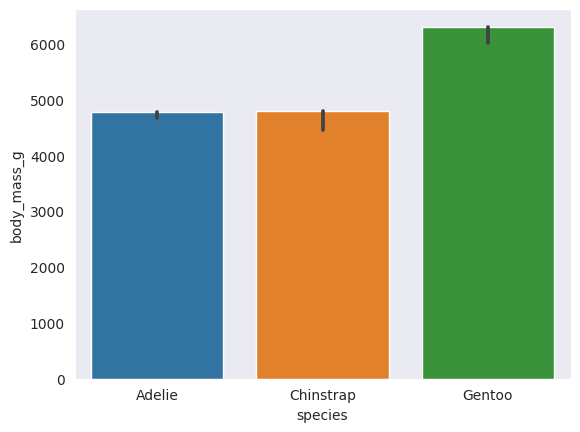

In [161]:
sns.barplot(x = df["species"],y = df ["body_mass_g"], estimator = np.max );

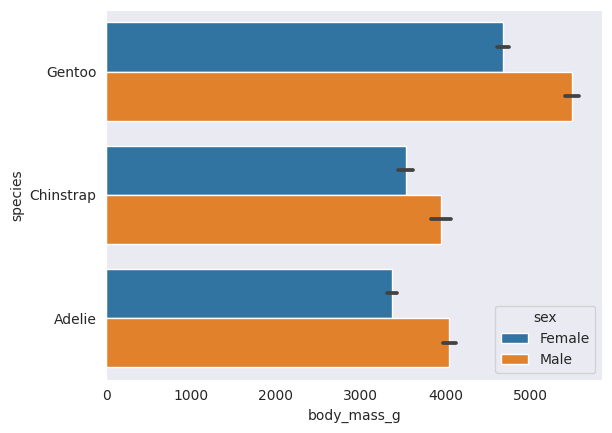

In [162]:
sns.barplot(x = df["body_mass_g"],y = df ["species"]
            ,hue=df["sex"]
            ,order= ["Gentoo","Chinstrap","Adelie"]
            ,hue_order =["Female","Male"]);

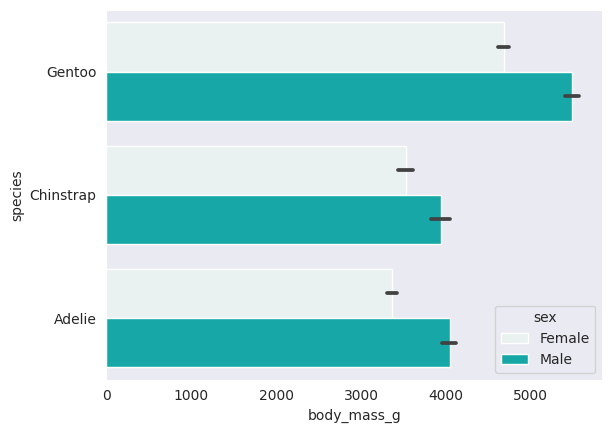

In [163]:
sns.barplot(x = df["body_mass_g"],y = df ["species"]
            ,hue=df["sex"]
            ,order= ["Gentoo","Chinstrap","Adelie"]
            ,hue_order =["Female","Male"]
            ,color="c");

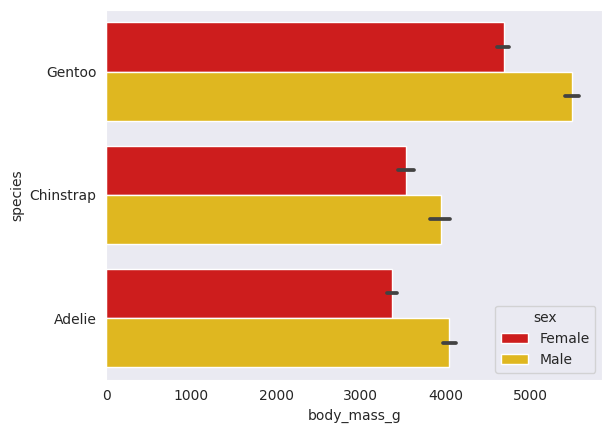

In [164]:
sns.barplot(x = df["body_mass_g"],y = df ["species"]
            ,hue=df["sex"]
            ,order= ["Gentoo","Chinstrap","Adelie"]
            ,hue_order =["Female","Male"]
            ,palette="hot");

# **STACKED BAR PLOT**

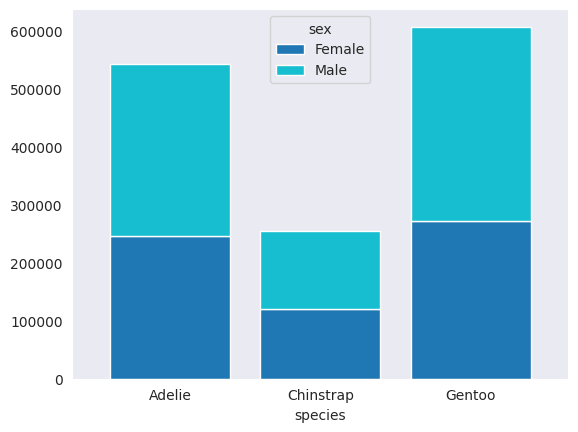

In [165]:
(df.groupby(["species","sex"])
  .body_mass_g
  .sum()
  .unstack()
  ).plot(kind="bar",stacked= True, color = ["tab:blue","tab:cyan"], width=0.8)


plt.xticks(rotation=0)
plt.ylabel=("Sum of Body Mass_g");

# **HISTPLOT**     
a graphical representation of the distribution of a continuous dataset

In [166]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

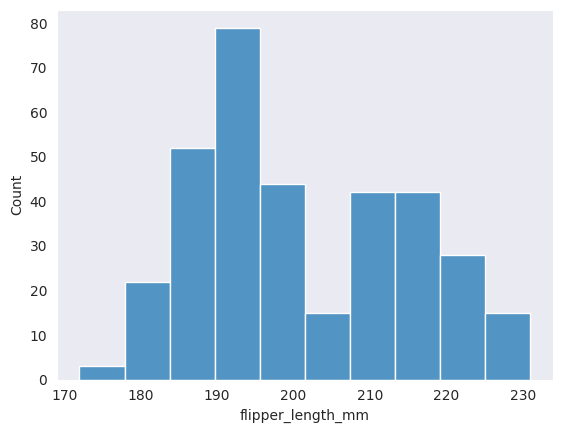

In [167]:
sns.histplot(x= df["flipper_length_mm"]);
#or
# sns.histplot (x= "flipper_length_mm", data=penguins);

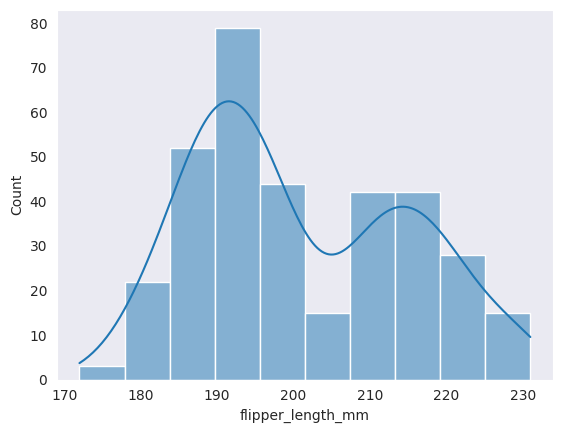

In [168]:
sns.histplot(x= df["flipper_length_mm"],kde = True);

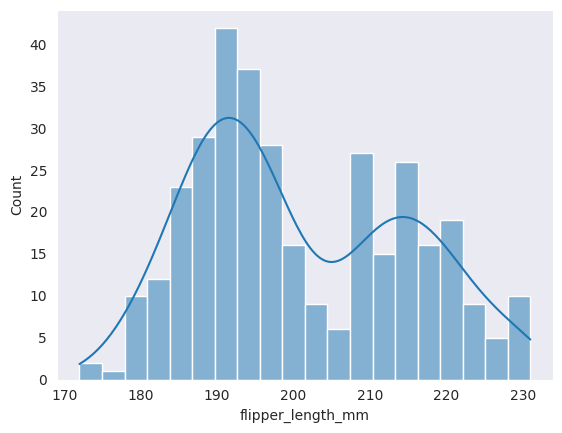

In [169]:
sns.histplot(x= df["flipper_length_mm"],kde = True, bins = 20);

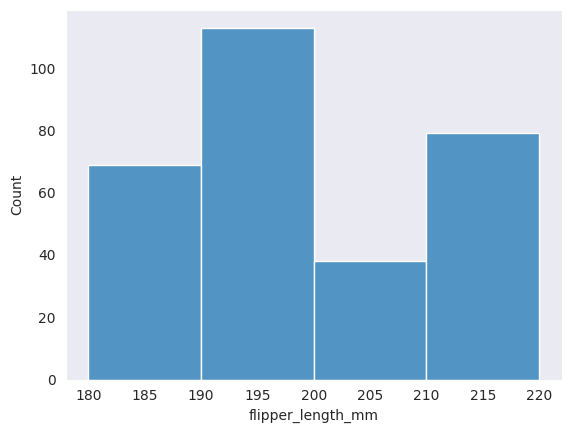

In [170]:
sns.histplot(x= df["flipper_length_mm"],binwidth = 10, binrange = [180,220],bins= 4);

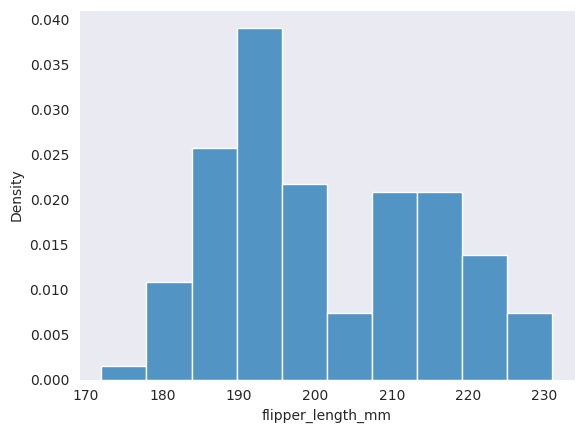

In [171]:
sns.histplot(x= df["flipper_length_mm"],stat = "density");  #Density; Area of Histogram Sums to One

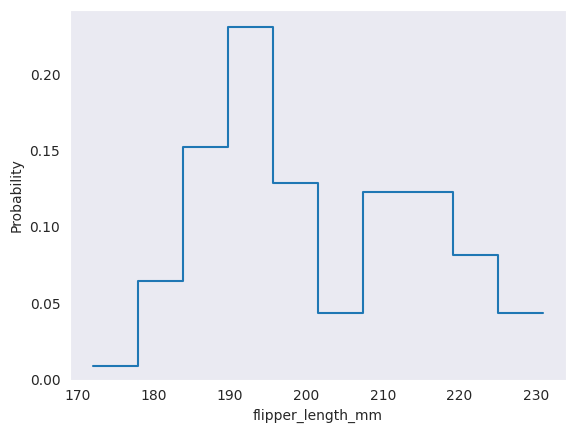

In [172]:
sns.histplot(x= df["flipper_length_mm"],stat = "probability", fill = False, element="step");

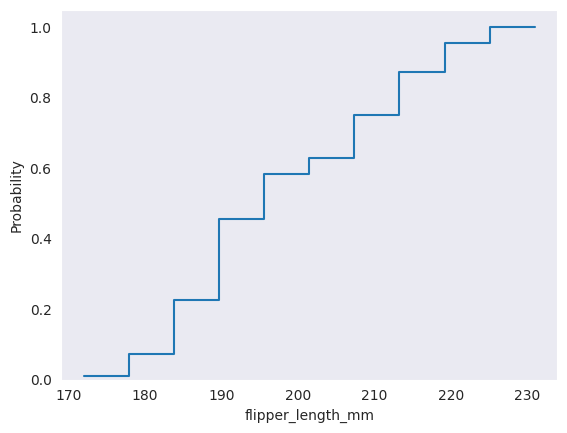

In [173]:
sns.histplot(x= df["flipper_length_mm"],stat = "probability", fill = False, element="step",cumulative = True);

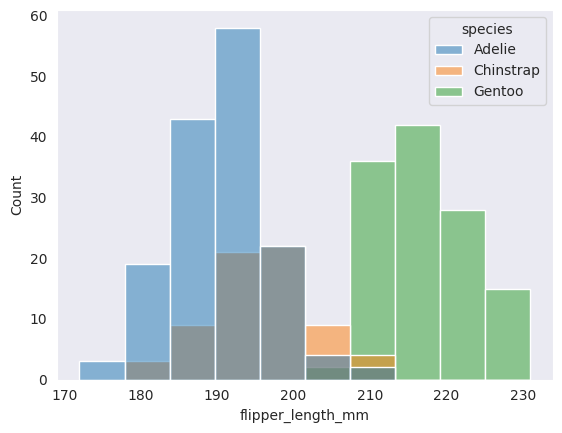

In [174]:
sns.histplot(x= df["flipper_length_mm"],hue = df["species"]);

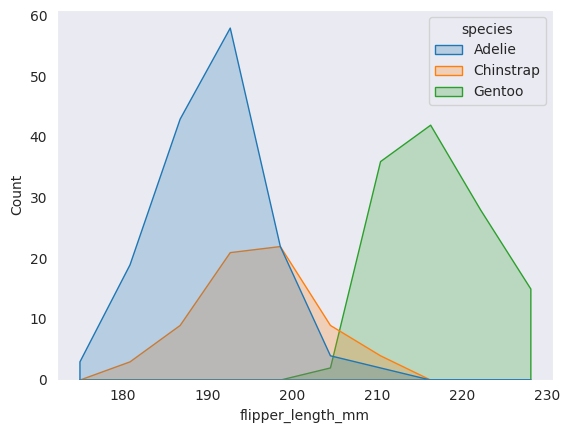

In [175]:
sns.histplot(x= df["flipper_length_mm"],hue = df["species"], element="poly");

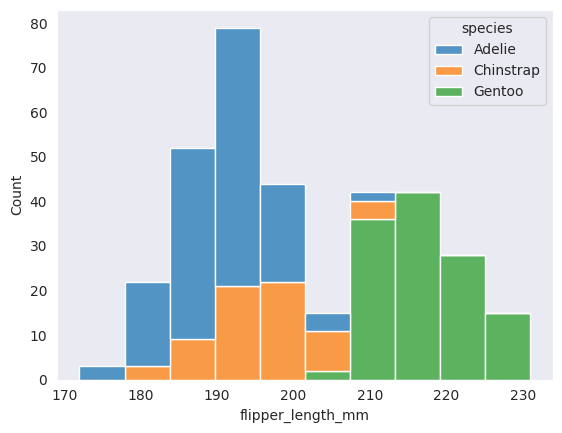

In [176]:
sns.histplot(x= df["flipper_length_mm"],hue = df["species"], multiple = "stack");  # multiple ="fill" You can try this one too..

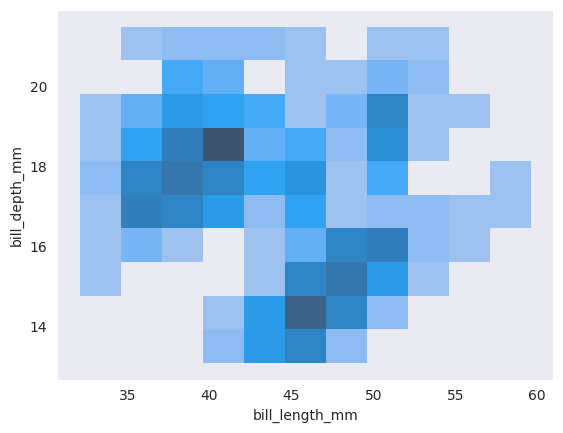

In [177]:
sns.histplot(x= df["bill_length_mm"], y = df["bill_depth_mm"] );  # WOW :)

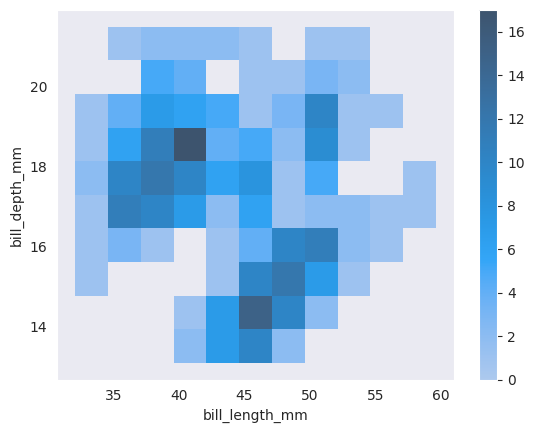

In [178]:
sns.histplot(x= df["bill_length_mm"], y = df["bill_depth_mm"] ,cbar = True);

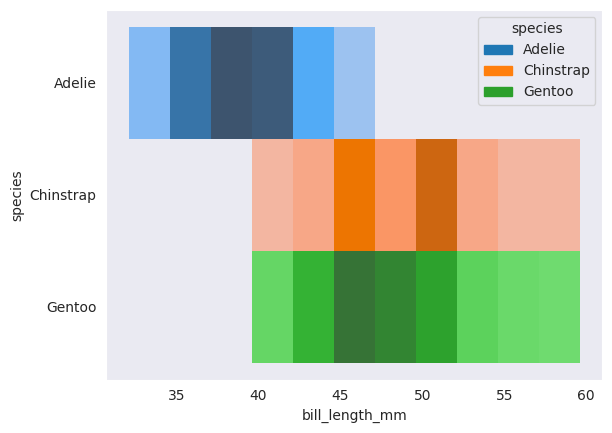

In [179]:
sns.histplot(x= df["bill_length_mm"], y = df["species"] , hue = df["species"] );

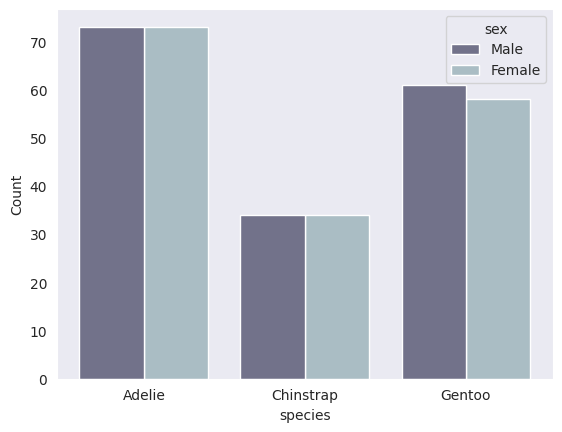

In [180]:
sns.histplot(x= df["species"],hue = df["sex"], multiple = "dodge", shrink =0.8, palette = "bone");

# **RELPLOT   (RELATİONAL PLOT)**

In [213]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  new_sex  
0       3750.0    Male     True  
1       3800.0  Female     True  
2       3250.0  Female     True  
3          NaN     NaN    False  
4       3450.0  Female     True

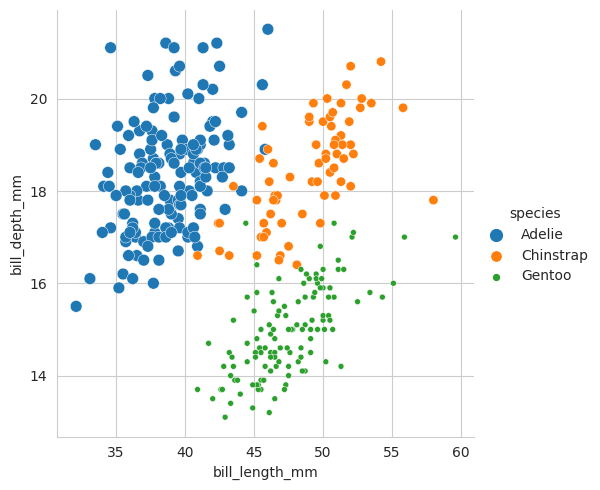

In [216]:
sns.relplot(x = df["bill_length_mm"],y = df["bill_depth_mm"],hue ="species",size="species",data=df);

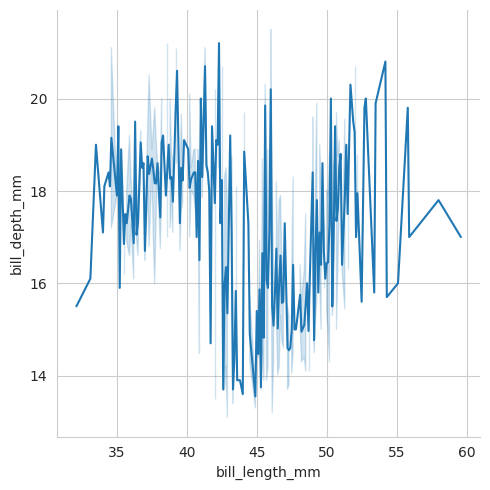

In [217]:
sns.relplot(x = df["bill_length_mm"],y = df["bill_depth_mm"],kind= "line",data =df);

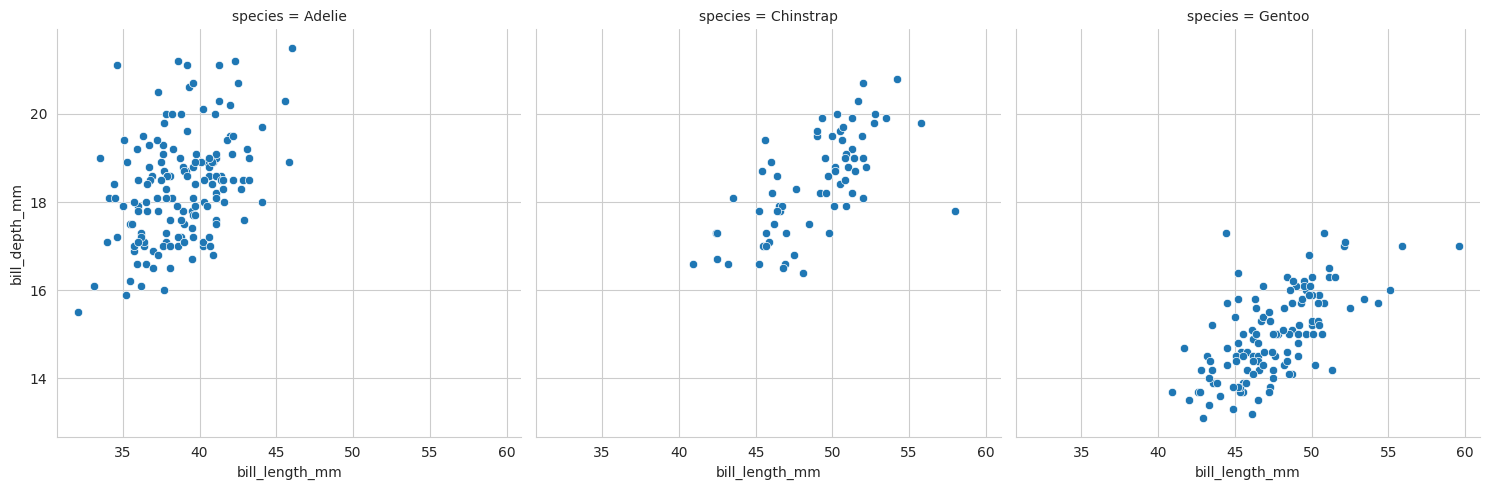

In [219]:
sns.relplot(x = df["bill_length_mm"],y = df["bill_depth_mm"], col="species",data=df);

# **BOXPLOT**

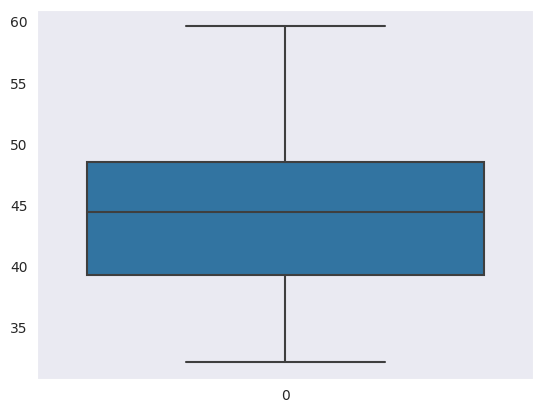

In [181]:
sns.boxplot(df.bill_length_mm);

In [182]:
df.bill_length_mm.describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

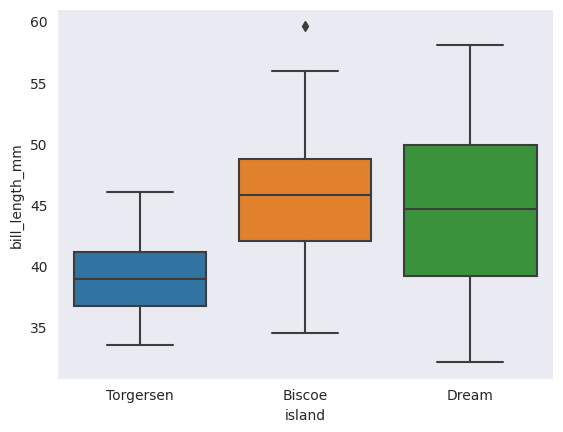

In [183]:
sns.boxplot(x= df["island"],y = df["bill_length_mm"]);

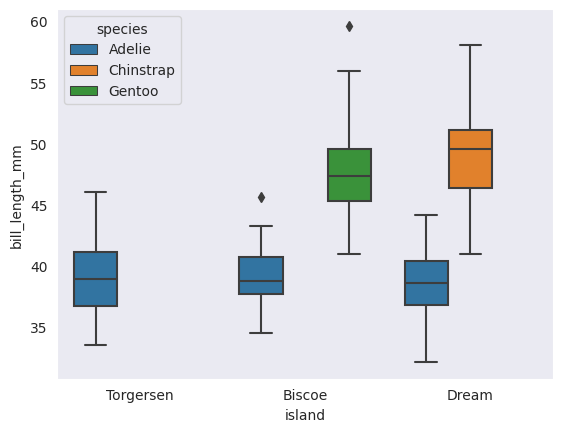

In [184]:
sns.boxplot(x= df["island"],y = df["bill_length_mm"],hue=df["species"]);

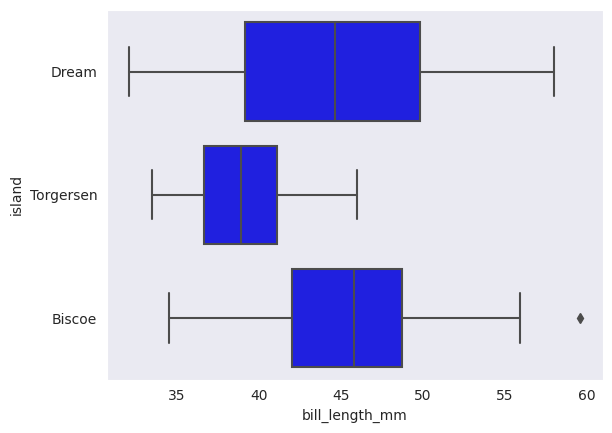

In [185]:
sns.boxplot(x= df["bill_length_mm"],y = df["island"]
            ,order = ["Dream","Torgersen","Biscoe"]
            ,color= "b");

In [186]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

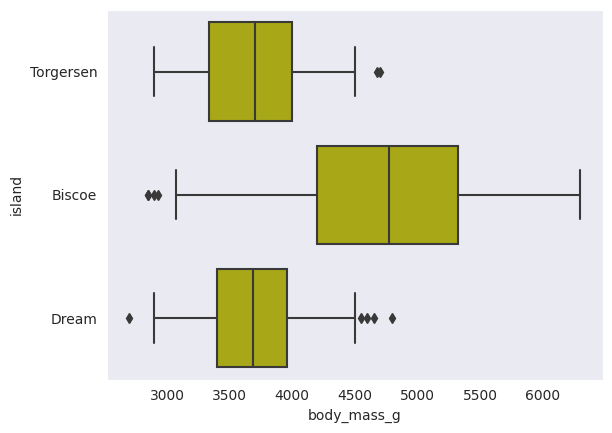

In [187]:
sns.boxplot(x= df["body_mass_g"],y = df["island"]
            ,color= "y",whis =1);

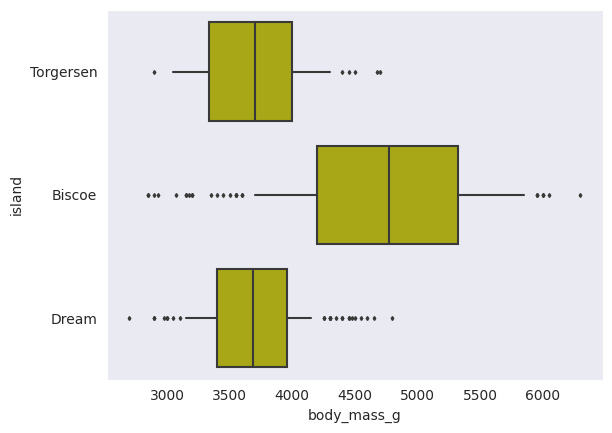

In [188]:
sns.boxplot(x= df["body_mass_g"],y = df["island"]
            ,color= "y"
            ,whis =0.5
            ,showcaps = False
            ,fliersize =2);

# **HEATMAP**

In [189]:
df.corr()

<ipython-input-189-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

<ipython-input-190-71878b9de4b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (df.corr(),annot = True, cmap= "viridis")


<Axes: >

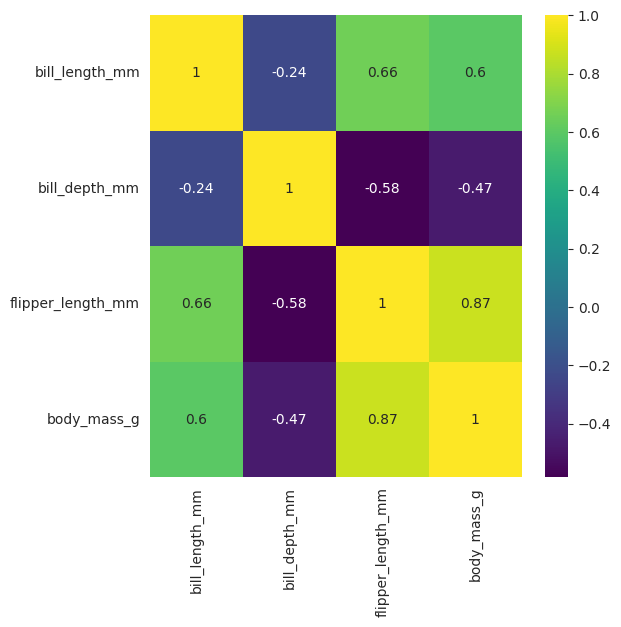

In [190]:
plt.figure(figsize =(6,6))
sns.heatmap (df.corr(),annot = True, cmap= "viridis")

# **PAIRPLOT**
 Plot pairwise relationships in a dataset numerical columns

In [191]:
sns.set_style("whitegrid")

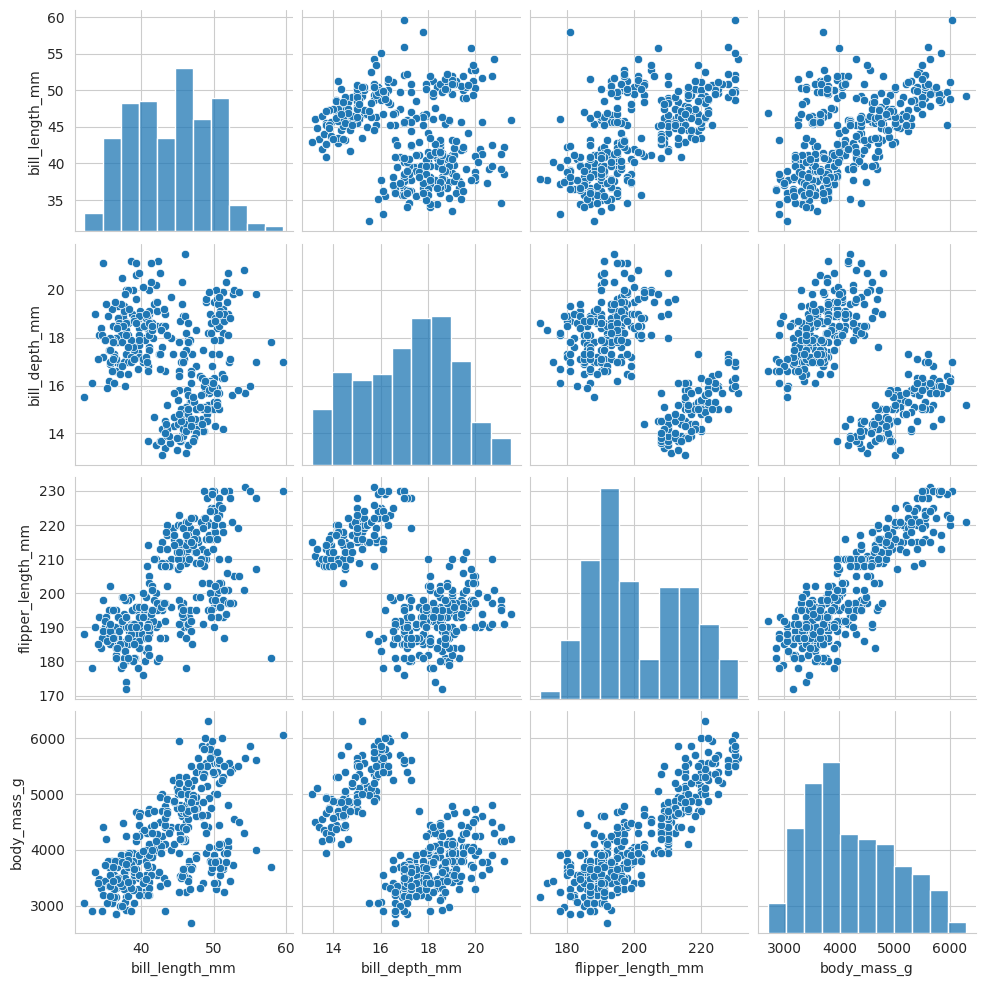

In [192]:
sns.pairplot(df);

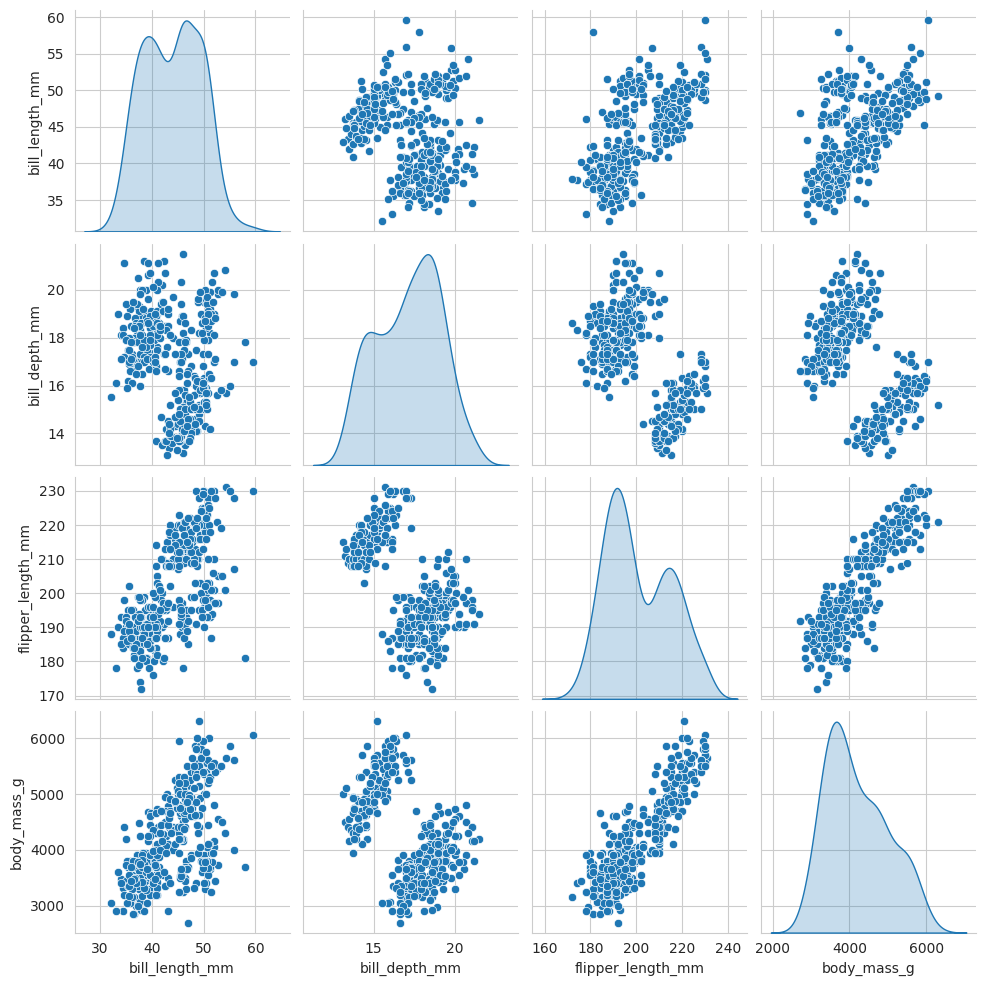

In [193]:
sns.pairplot(df,diag_kind="kde")    # Histogram is gone, KDE graph is here ;)

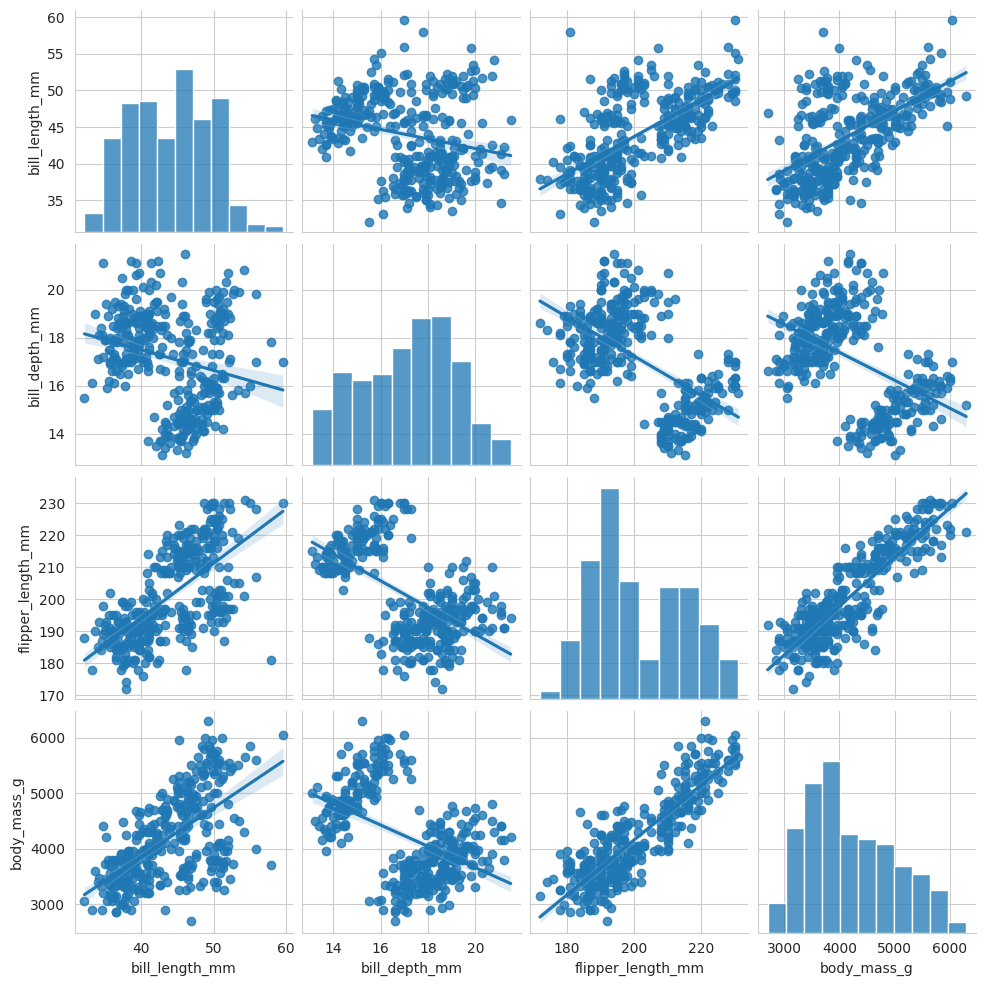

In [194]:
sns.pairplot(df,kind="reg");

In [195]:
df.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [196]:
df["new_sex"]=df.sex.isin(["Female","Male"]);

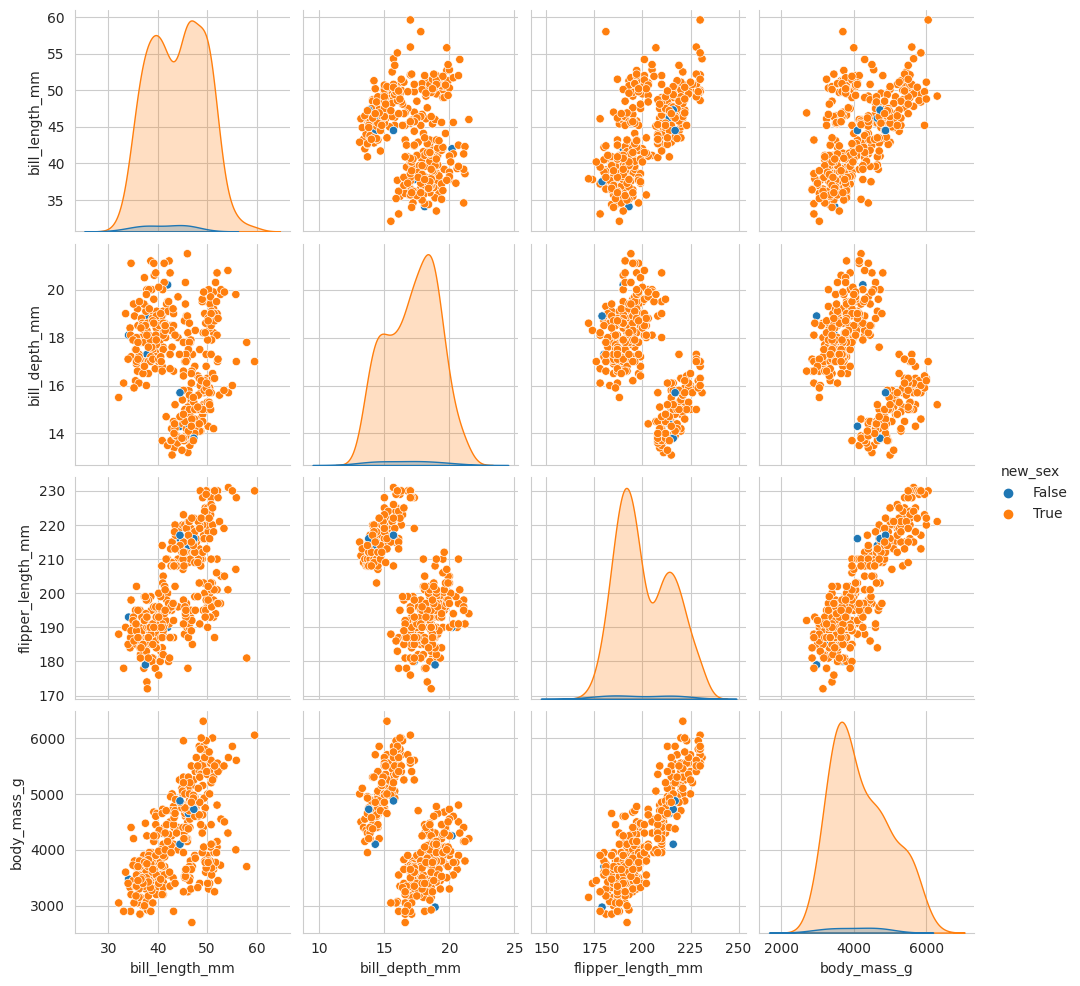

In [197]:
sns.pairplot(df, hue="new_sex");

In [120]:
df["new_sex"].dtype

dtype('bool')

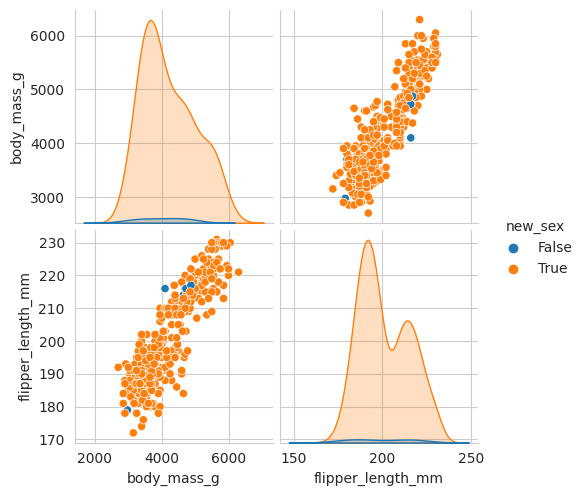

In [198]:
sns.pairplot(df, hue="new_sex",vars=["body_mass_g","flipper_length_mm"]);

In [127]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'new_species', 'new_sex'],
      dtype='object')

In [201]:
from ipywidgets import interactive
def size_widget (height=2,aspect=1.5):
    sns.pairplot(df,height=height,aspect=aspect)


interactive(children=(IntSlider(value=3, description='height', max=3, min=3, step=2), FloatSlider(value=1.5, d…

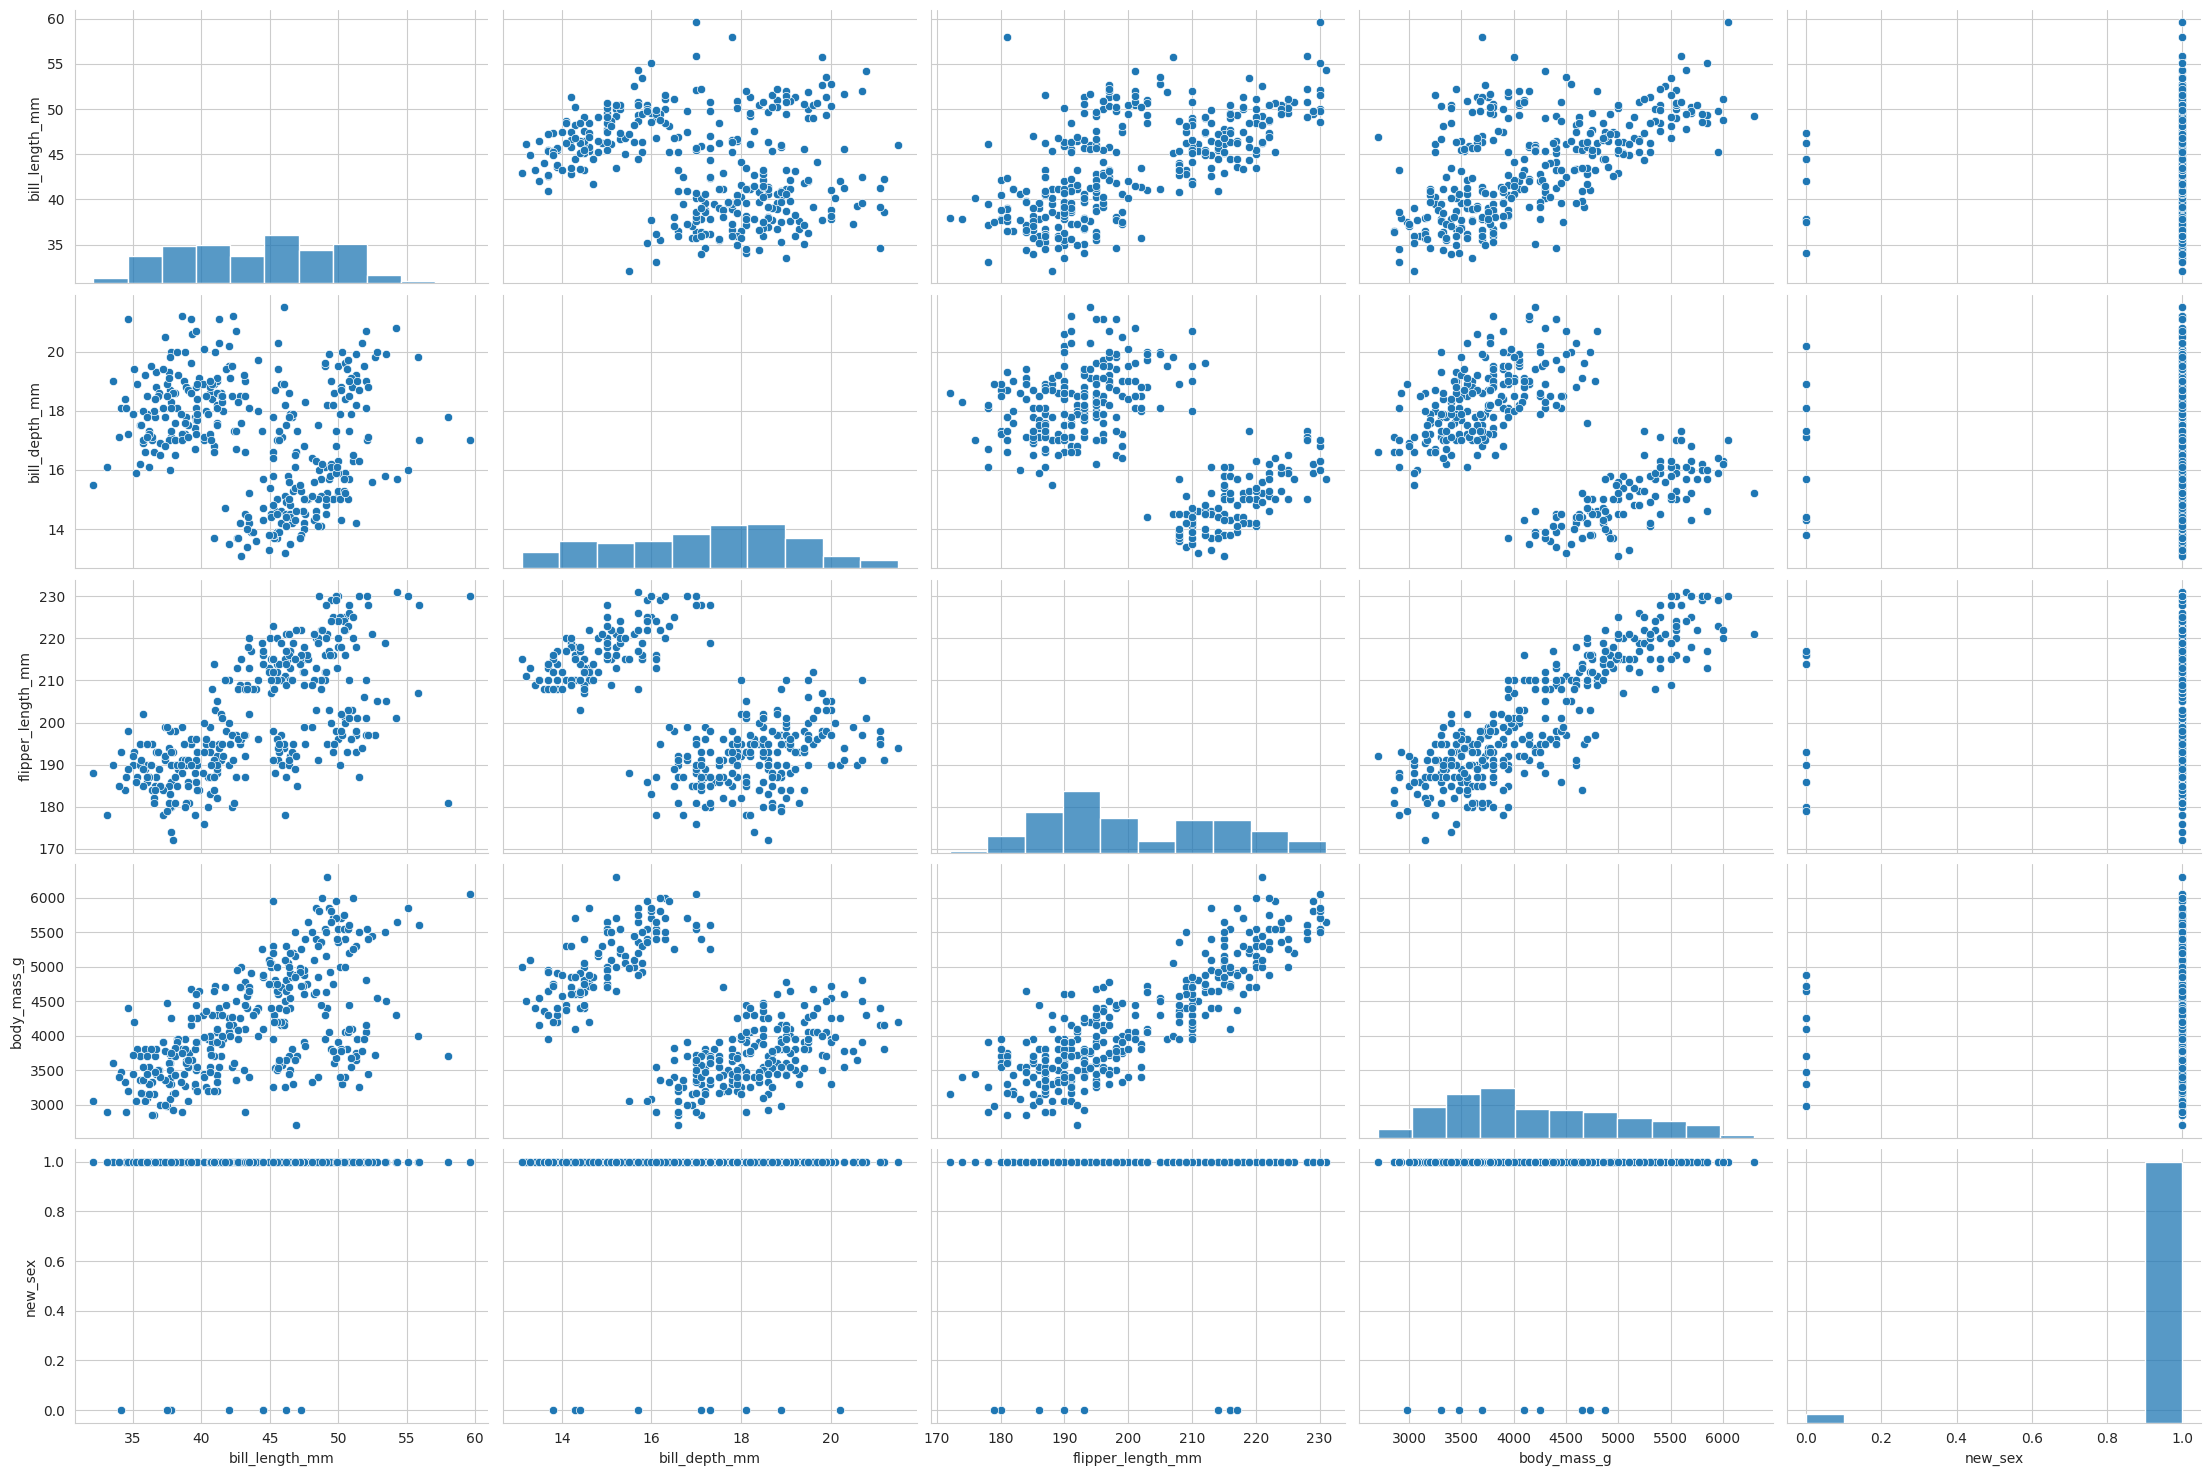

In [204]:
interactive(size_widget,height= (3,3,2),aspect=(0.5,2,0.25))

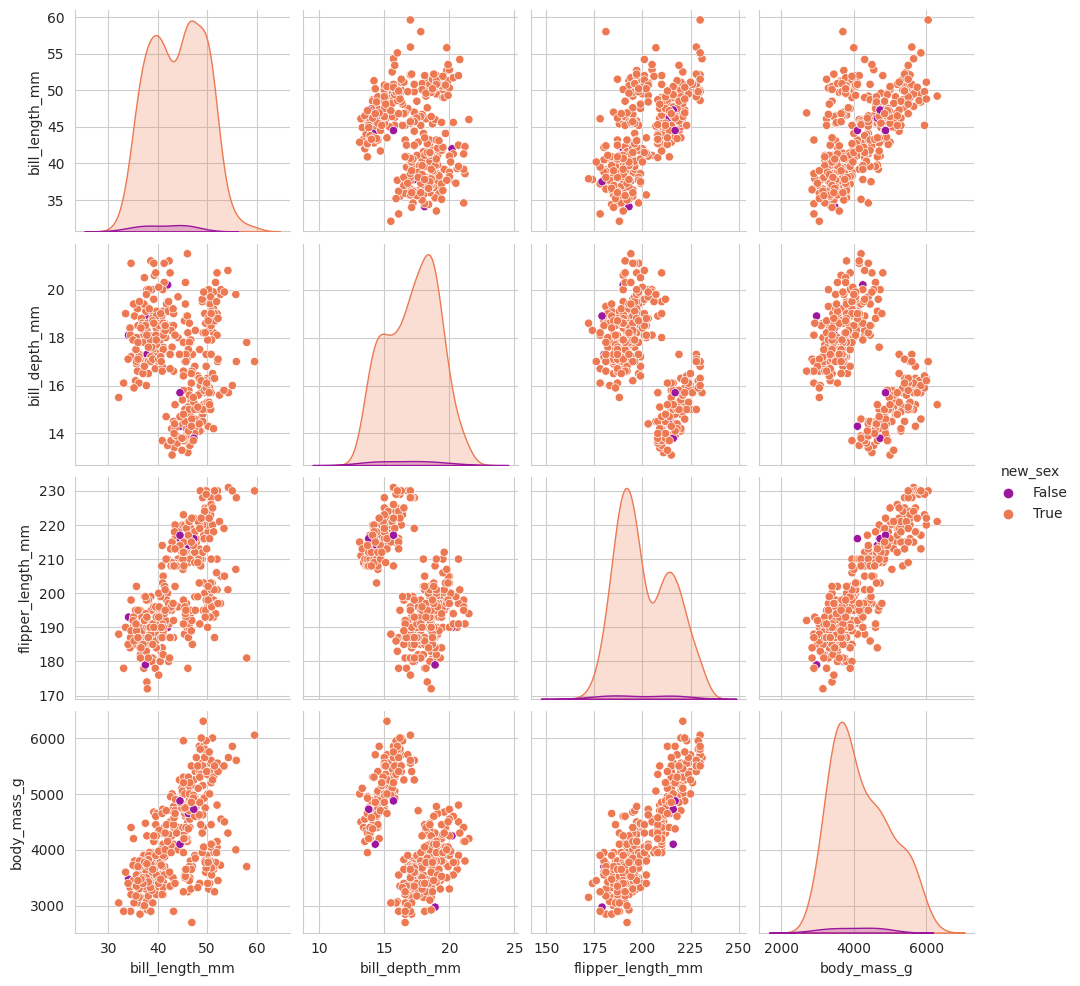

In [205]:
sns.pairplot(df, hue="new_sex",palette="plasma");

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


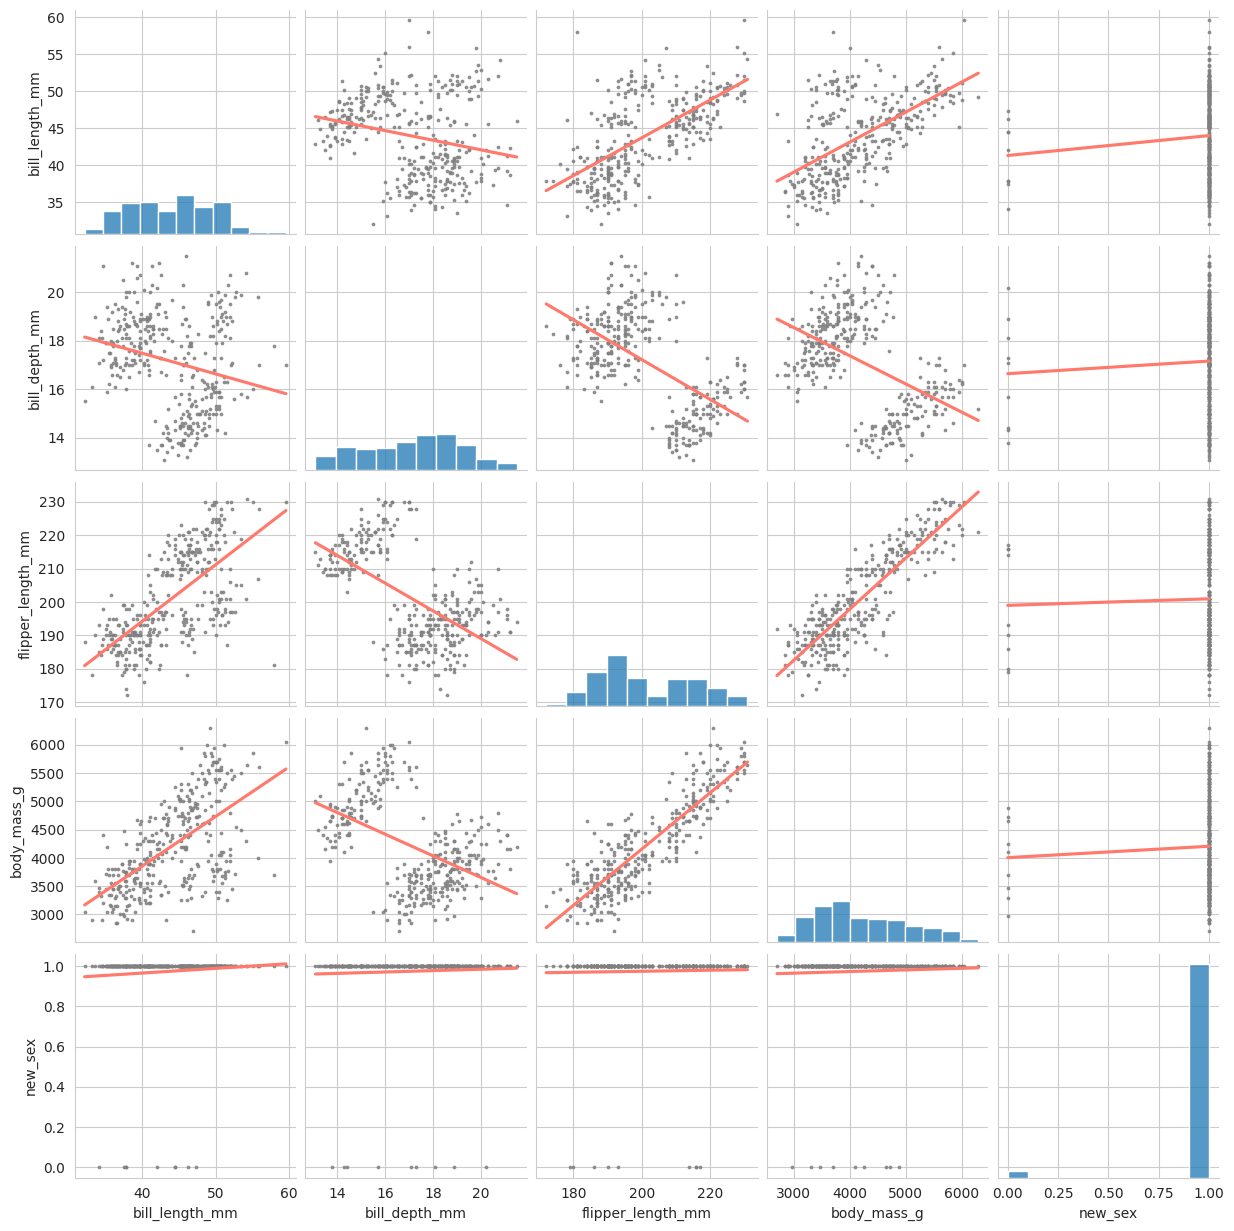

In [212]:
sns.pairplot(df,kind="reg",
             plot_kws={"ci": None,"color" : "xkcd:salmon",
             "scatter_kws" :{"color" : "gray","s":3}
                       }
            ,)

# **JOINTPLOT**

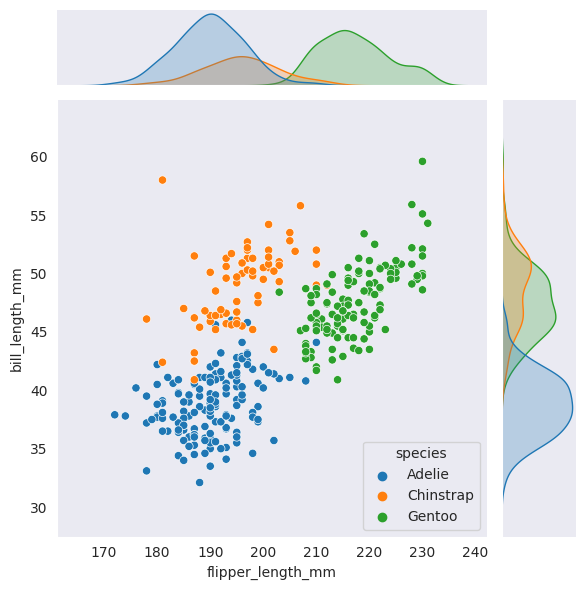

In [58]:
sns.jointplot(data= df, x="flipper_length_mm", y="bill_length_mm", hue="species");

# **CATPLOT**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be plac

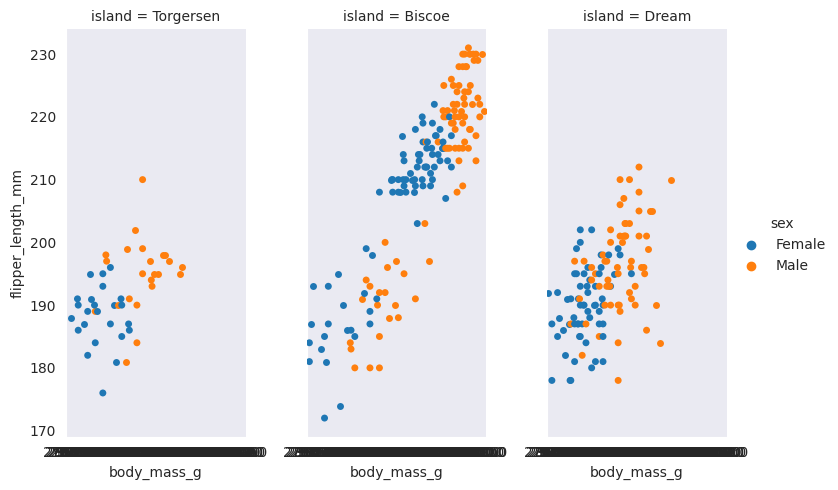

In [62]:
sns.catplot(
    data= df , kind="swarm",
    x="body_mass_g", y="flipper_length_mm", hue="sex", col="island",
    aspect=.5
);

# **VIOLINPLOT**
A combination of boxplot and KDE Plot (kernel density estimation).

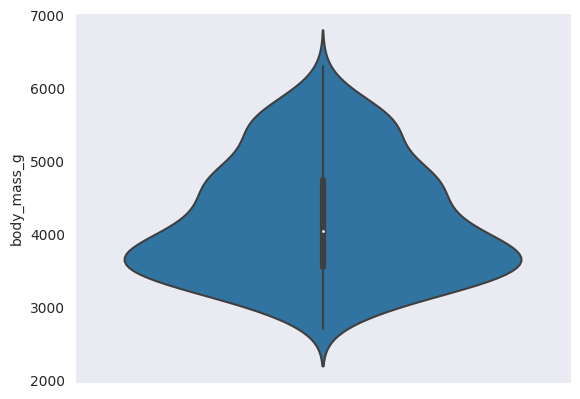

In [71]:
sns.violinplot(y = df["body_mass_g"]);


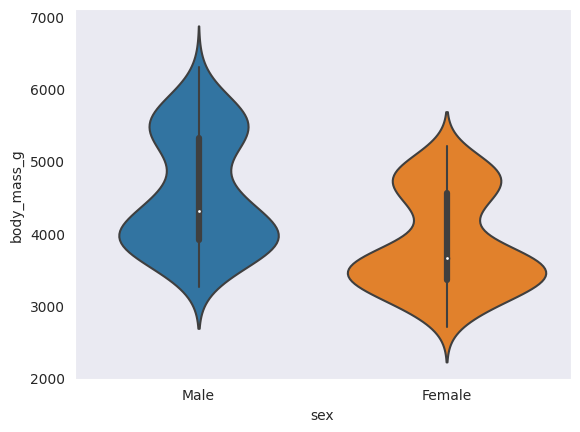

In [72]:
sns.violinplot(x =df["sex"], y = df["body_mass_g"]);

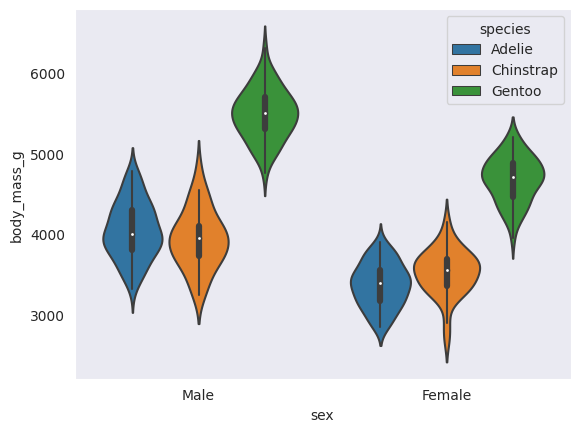

In [77]:
sns.violinplot(x =df["sex"], y = df["body_mass_g"],hue = df["species"]);

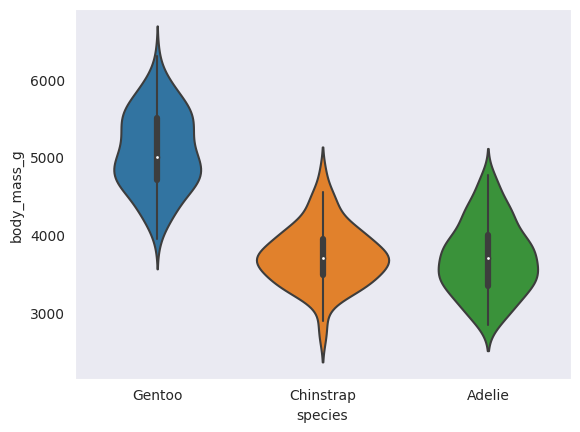

In [79]:
sns.violinplot(x =df["species"], y = df["body_mass_g"],order = ["Gentoo","Chinstrap","Adelie"]);

# **SWARMPLOT**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:r'` for same effect.
  warnings.warn(msg, FutureWarning)


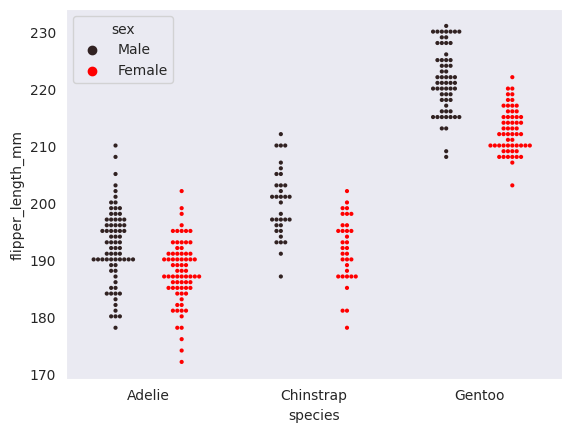

In [64]:
sns.swarmplot(x = df["species"], y = df["flipper_length_mm"],hue = df["sex"],legend= True, color = "r", size = 3);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:b'` for same effect.
  warnings.warn(msg, FutureWarning)


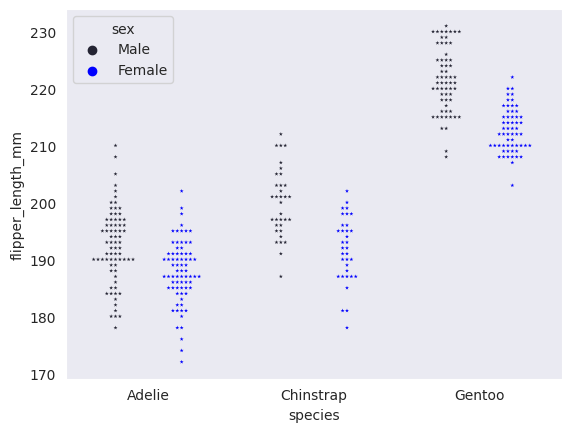

In [66]:
sns.swarmplot(x = df["species"], y = df["flipper_length_mm"],hue = df["sex"], color = "b", size = 3, dodge=True,marker ="*");

# **FOR MUCH MORE "https://seaborn.pydata.org/"**